Run file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json
from pandas import json_normalize

warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/socialmedia.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


Print All column names

In [3]:
print(df.columns)

Index(['UserID', 'Age', 'Gender', 'Location', 'Income', 'Debt',
       'Owns Property', 'Profession', 'Demographics', 'Platform',
       'Total Time Spent', 'Number of Sessions', 'Video ID', 'Video Category',
       'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video',
       'Number of Videos Watched', 'Scroll Rate', 'Frequency',
       'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'DeviceType', 'OS',
       'Watch Time', 'Self Control', 'Addiction Level', 'CurrentActivity',
       'ConnectionType'],
      dtype='object')


Extract data who use TikTok platform

In [4]:
tiktok_users = df[df['Platform'] == 'TikTok']
print(tiktok_users)


     UserID  Age  Gender     Location  Income   Debt  Owns Property  \
4         5   25    Male     Pakistan   22096  False           True   
6         7   56    Male        India   46201  False          False   
11       12   41   Other  Philippines   25105  False          False   
24       25   50    Male      Germany   82424   True           True   
25       26   29    Male        Japan   65603   True          False   
..      ...  ...     ...          ...     ...    ...            ...   
985     986   55  Female      Germany   69429   True          False   
988     989   53    Male  Philippines   27659  False           True   
993     994   23  Female        India   75751   True           True   
995     996   22    Male        India   74254   True           True   
997     998   27    Male        India   94218   True           True   

        Profession Demographics Platform  ...  ProductivityLoss  Satisfaction  \
4          Manager        Urban   TikTok  ...                 8   

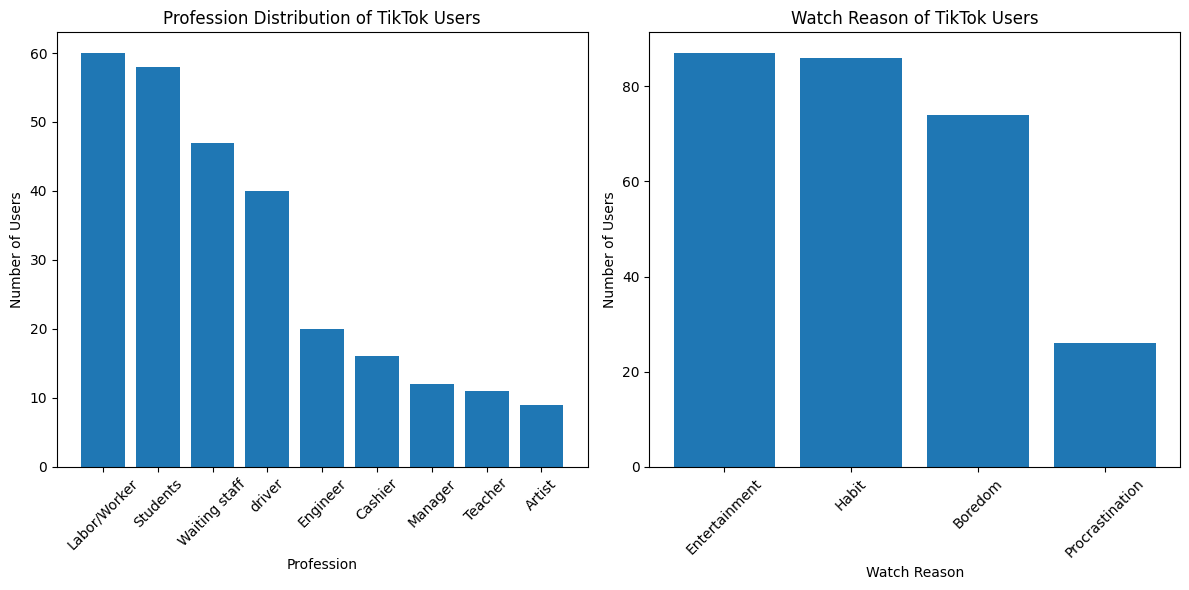

In [5]:
profession_counts = tiktok_users.groupby('Profession')['UserID'].count().sort_values(ascending=False)
watch_reasons_counts = tiktok_users.groupby('Watch Reason')['UserID'].count().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(profession_counts.index, profession_counts.values)
axes[0].set_title('Profession Distribution of TikTok Users')
axes[0].set_xlabel('Profession')
axes[0].set_ylabel('Number of Users')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(watch_reasons_counts.index, watch_reasons_counts.values)
axes[1].set_title('Watch Reason of TikTok Users')
axes[1].set_xlabel('Watch Reason')
axes[1].set_ylabel('Number of Users')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


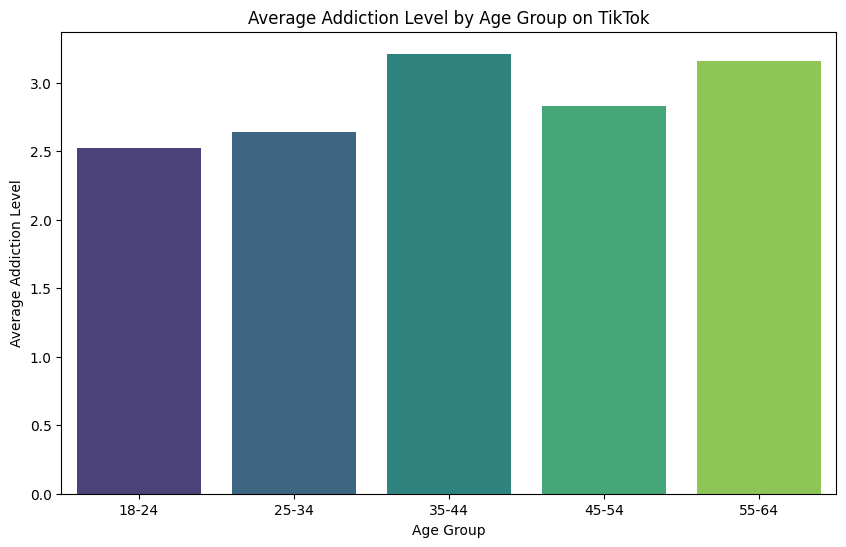

In [6]:
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
tiktok_users['Age Group'] = pd.cut(tiktok_users['Age'], bins=age_bins, labels=age_labels, right=False)

age_group_addiction = tiktok_users.groupby('Age Group')['Addiction Level'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_addiction, x='Age Group', y='Addiction Level', palette='viridis')
plt.title('Average Addiction Level by Age Group on TikTok')
plt.xlabel('Age Group')
plt.ylabel('Average Addiction Level')
plt.show()


What is the relationship between addiction levels and satisfaction within each age group on TikTok?

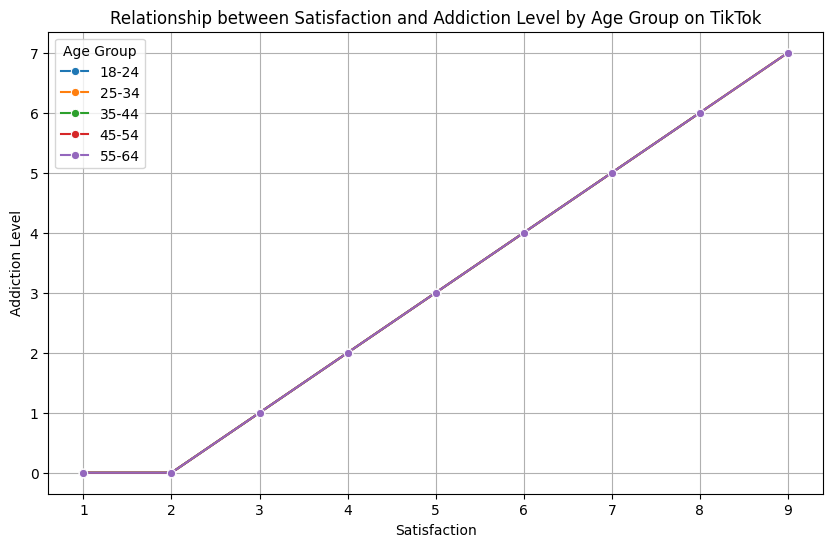

  Age Group  Correlation between Satisfaction and Addiction
0     18-24                                        0.997208
1     25-34                                        0.992685
2     35-44                                        0.998287
3     45-54                                        0.992564
4     55-64                                        0.997280


In [7]:
age_group_addiction = tiktok_users.groupby('Age Group')['Addiction Level'].mean().reset_index()

age_addiction_satisfaction = tiktok_users.groupby(['Age Group', 'Satisfaction'])['Addiction Level'].mean().reset_index()
custom_palette = sns.color_palette("tab10", n_colors=len(age_labels))

plt.figure(figsize=(10, 6))
sns.lineplot(x='Satisfaction', y='Addiction Level', hue='Age Group', data=age_addiction_satisfaction, palette=custom_palette, marker='o')
plt.title('Relationship between Satisfaction and Addiction Level by Age Group on TikTok')
plt.xlabel('Satisfaction')
plt.ylabel('Addiction Level')
plt.grid(True)
plt.show()


age_group_correlation = tiktok_users.groupby('Age Group').apply(lambda x: x['Addiction Level'].corr(x['Satisfaction'])).reset_index()
age_group_correlation.columns = ['Age Group', 'Correlation between Satisfaction and Addiction']

print(age_group_correlation)
